# Project Description

There has been an increase in the need of Data Scientists since 2012, and this has also been accompanied with a juicy take-home salary. In this project, we'd be visualizing and analyzing several features associated with the salary that a person working in data science can receive. 

In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Features Description


- work_year: The year the salary was paid.


- experience_level: The experience level in the job during the year with the following 
possible values: EN [Entry-level / Junior], MI [Mid-level / Intermediate], SE 
[Senior-level / Expert], EX [Executive-level / Director]

- employment_type The type of employement for the role: PT Part-time FT Full-time CT 
Contract FL Freelance


- job_title: The role worked in during the year.


- salary: The total gross salary amount paid.


- salary_currency: The currency of the salary paid as an ISO 4217 currency code.


- salaryinusd: The salary in USD (FX rate divided by avg. USD rate for the respective 
year via fxdata.foorilla.com).


- employee_residence: Employee's primary country of residence in during the work year as an 
ISO 3166 country code.


- remote_ratio: The overall amount of work done remotely, possible values are as 
follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully 
remote (more than 80%)


- company_location: The country of the employer's main office or contracting branch as an 
ISO 3166 country code.


- company_size: The average number of people that worked for the company during the 
year: S less than 50 employees (small) M 50 to 250 employees (medium) 
L more than 250 employees (large)

## Data Inspection

In [2]:
# importing dataset
data = pd.read_csv(r'C:\Users\USER\Desktop\10alytics\Internship\ds_salaries.csv')
data.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [3]:
data.tail(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
599,599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
600,600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
601,601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [4]:
# Creating of a Copy of the original data for data exploration and manipulation
df = data.copy()

In [5]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
# checking for null values
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# dropping the Unnamed column, since it tallies with the original row numbering, and we won't need it
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
# checking for description of each column
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Few Column Entity Definitions

In [9]:
# Experience Category

def experience_bracket(experience_level):
    if experience_level == 'EN':
        return 'Entry level'
    elif experience_level == 'MI':
        return 'Junior Mid-level'
    elif experience_level == 'SE':
        return 'Senior Intermediate-level'
    elif experience_level == 'EX':
        return 'Executive Expert level'
    else:
        return 'Director'
    
# Create a new column for experience category
df['experience_category'] = df['experience_level'].apply(experience_bracket)

In [10]:
# Employment category

def employment_bracket(employment_type):
    if employment_type == 'PT':
        return 'Part time'
    elif employment_type == 'FT':
        return 'Full time'
    elif employment_type == 'CT':
        return 'Contract'
    else:
        return 'Freelance'
    
df['employment_category'] = df['employment_type'].apply(employment_bracket)

In [11]:
# remote ratio category

def remote_bracket(remote_ratio):
    if remote_ratio == 0:
        return 'No remote'
    elif remote_ratio == 50:
        return 'partially remote'
    else:
        return 'Fully remote'
    
df['remote_category'] = df['remote_ratio'].apply(remote_bracket)

In [12]:
# company size category

def company_size_bracket(company_size):
    if company_size == 'S':
        return 'Small'
    elif company_size == 'M':
        return 'Medium'
    else:
        return 'Large'
    
df['company_size_category'] = df['company_size'].apply(company_size_bracket)

In [13]:
# Finding out number of rows and columns
df.shape

(607, 15)

In [14]:
#Work Year
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [15]:
#Experience Level
df.experience_category.value_counts()

Senior Intermediate-level    280
Junior Mid-level             213
Entry level                   88
Executive Expert level        26
Name: experience_category, dtype: int64

In [16]:
#Employment Type
df.employment_category.value_counts()

Full time    588
Part time     10
Contract       5
Freelance      4
Name: employment_category, dtype: int64

In [17]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [18]:
df.job_title.describe()

count                607
unique                50
top       Data Scientist
freq                 143
Name: job_title, dtype: object

In [19]:
df.job_title.min()

'3D Computer Vision Researcher'

In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,employment_category,remote_category,company_size_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Junior Mid-level,Full time,No remote,Large
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Senior Intermediate-level,Full time,No remote,Small
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Senior Intermediate-level,Full time,partially remote,Medium
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Junior Mid-level,Full time,No remote,Small
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Senior Intermediate-level,Full time,partially remote,Large


In [21]:
# Salary Currency
df.salary_currency.value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

In [22]:
df.salary_currency.unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [23]:
df.salary_currency.describe()

count     607
unique     17
top       USD
freq      398
Name: salary_currency, dtype: object

In [24]:
# Salary in USD
df.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [25]:
# Employee Residence
df.employee_residence.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [26]:
df.employee_residence.value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [27]:
df.employee_residence.describe()

count     607
unique     57
top        US
freq      332
Name: employee_residence, dtype: object

In [28]:
# Remote Ratio
df.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

In [29]:
df.remote_category.value_counts()

Fully remote        381
No remote           127
partially remote     99
Name: remote_category, dtype: int64

In [30]:
df.remote_category.describe()

count              607
unique               3
top       Fully remote
freq               381
Name: remote_category, dtype: object

In [31]:
#Company Location
df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [201]:
##New DataFrame with the ISO Code Interpretation Renaming
cld = df.replace(['US','GB','CA','DE','IN','FR','ES','GR','JP','PL','RU','NZ','IL','AU','AE','DZ','IQ','AT','NL','MX','LU','HU','CL','BR','MY'], ["United States of America","United Kingdom of Great Britain","Canada","Germany","India","France","Spain", "Greece","Japan","Poland",'Russia','New Zealand','Israel','Australia','United Arab Emirates','Algeria','Iraq','Austria','Netherlands','Mexico','Luxembourg','Hungary','Chile','Brazil','Malaysia'])
cld

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,employment_category,remote_category,company_size_category,sal_grp
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L,Junior Mid-level,Full time,No remote,Large,<=120k
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S,Senior Intermediate-level,Full time,No remote,Small,<=360k
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,United Kingdom of Great Britain,50,United Kingdom of Great Britain,M,Senior Intermediate-level,Full time,partially remote,Medium,<=120k
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Junior Mid-level,Full time,No remote,Small,<=120k
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,United States of America,50,United States of America,L,Senior Intermediate-level,Full time,partially remote,Large,<=240k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,United States of America,100,United States of America,M,Senior Intermediate-level,Full time,Fully remote,Medium,<=240k
603,2022,SE,FT,Data Engineer,126000,USD,126000,United States of America,100,United States of America,M,Senior Intermediate-level,Full time,Fully remote,Medium,<=240k
604,2022,SE,FT,Data Analyst,129000,USD,129000,United States of America,0,United States of America,M,Senior Intermediate-level,Full time,No remote,Medium,<=240k
605,2022,SE,FT,Data Analyst,150000,USD,150000,United States of America,100,United States of America,M,Senior Intermediate-level,Full time,Fully remote,Medium,<=240k


In [202]:
cld.company_location.value_counts()

United States of America           355
United Kingdom of Great Britain     47
Canada                              30
Germany                             28
India                               24
France                              15
Spain                               14
Greece                              11
Japan                                6
Netherlands                          4
Austria                              4
PT                                   4
Poland                               4
Luxembourg                           3
PK                                   3
Brazil                               3
United Arab Emirates                 3
Mexico                               3
Australia                            3
TR                                   3
DK                                   3
IT                                   2
CZ                                   2
SI                                   2
Russia                               2
CH                       

In [34]:
cld.company_location.value_counts()[:10]

United States of America           355
United Kingdom of Great Britain     47
Canada                              30
Germany                             28
India                               24
France                              15
Spain                               14
Greece                              11
Japan                                6
Netherlands                          4
Name: company_location, dtype: int64

In [35]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,employment_category,remote_category,company_size_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Junior Mid-level,Full time,No remote,Large
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Senior Intermediate-level,Full time,No remote,Small
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Senior Intermediate-level,Full time,partially remote,Medium
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Junior Mid-level,Full time,No remote,Small
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Senior Intermediate-level,Full time,partially remote,Large


In [36]:
df.company_location.describe()

count     607
unique     50
top        US
freq      355
Name: company_location, dtype: object

In [37]:
# Company Size
df.company_size.describe()

count     607
unique      3
top         M
freq      326
Name: company_size, dtype: object

In [38]:
df.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   work_year              607 non-null    int64 
 1   experience_level       607 non-null    object
 2   employment_type        607 non-null    object
 3   job_title              607 non-null    object
 4   salary                 607 non-null    int64 
 5   salary_currency        607 non-null    object
 6   salary_in_usd          607 non-null    int64 
 7   employee_residence     607 non-null    object
 8   remote_ratio           607 non-null    int64 
 9   company_location       607 non-null    object
 10  company_size           607 non-null    object
 11  experience_category    607 non-null    object
 12  employment_category    607 non-null    object
 13  remote_category        607 non-null    object
 14  company_size_category  607 non-null    object
dtypes: int64(4), object(11)

In [40]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,employment_category,remote_category,company_size_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Junior Mid-level,Full time,No remote,Large
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Senior Intermediate-level,Full time,No remote,Small
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Senior Intermediate-level,Full time,partially remote,Medium
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Junior Mid-level,Full time,No remote,Small
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Senior Intermediate-level,Full time,partially remote,Large


In [41]:
## Categorizing seemingly valuable features to check their influence on one another
sal = df[['experience_category', 'employment_category', 'job_title', 'salary_in_usd' ]]
sal.head(15)

,experience_category,employment_category,job_title,salary_in_usd
0,Junior Mid-level,Full time,Data Scientist,79833
1,Senior Intermediate-level,Full time,Machine Learning Scientist,260000
2,Senior Intermediate-level,Full time,Big Data Engineer,109024
3,Junior Mid-level,Full time,Product Data Analyst,20000
4,Senior Intermediate-level,Full time,Machine Learning Engineer,150000
5,Entry level,Full time,Data Analyst,72000
6,Senior Intermediate-level,Full time,Lead Data Scientist,190000
7,Junior Mid-level,Full time,Data Scientist,35735
8,Junior Mid-level,Full time,Business Data Analyst,135000
9,Senior Intermediate-level,Full time,Lead Data Engineer,125000


In [42]:
sal.tail(15)

,experience_category,employment_category,job_title,salary_in_usd
592,Senior Intermediate-level,Full time,Data Scientist,230000
593,Senior Intermediate-level,Full time,Data Scientist,150000
594,Senior Intermediate-level,Full time,Data Analytics Manager,150260
595,Senior Intermediate-level,Full time,Data Analytics Manager,109280
596,Senior Intermediate-level,Full time,Data Scientist,210000
597,Senior Intermediate-level,Full time,Data Analyst,170000
598,Junior Mid-level,Full time,Data Scientist,160000
599,Junior Mid-level,Full time,Data Scientist,130000
600,Entry level,Full time,Data Analyst,67000
601,Entry level,Full time,Data Analyst,52000


In [43]:
df[['experience_category', 'employment_category', 'job_title']].describe()

,experience_category,employment_category,job_title
count,607,607,607
unique,4,4,50
top,Senior Intermediate-level,Full time,Data Scientist
freq,280,588,143


In [44]:
jc = df[['job_title', 'company_size_category']]
jc.head()

,job_title,company_size_category
0,Data Scientist,Large
1,Machine Learning Scientist,Small
2,Big Data Engineer,Medium
3,Product Data Analyst,Small
4,Machine Learning Engineer,Large


In [45]:
jc.tail()

,job_title,company_size_category
602,Data Engineer,Medium
603,Data Engineer,Medium
604,Data Analyst,Medium
605,Data Analyst,Medium
606,AI Scientist,Large


In [46]:
jc.describe()

,job_title,company_size_category
count,607,607
unique,50,3
top,Data Scientist,Medium
freq,143,326


In [47]:
erc = df[['employee_residence', 'remote_category', 'company_location']]
erc.head()

,employee_residence,remote_category,company_location
0,DE,No remote,DE
1,JP,No remote,JP
2,GB,partially remote,GB
3,HN,No remote,HN
4,US,partially remote,US


In [48]:
erc.tail()

,employee_residence,remote_category,company_location
602,US,Fully remote,US
603,US,Fully remote,US
604,US,No remote,US
605,US,Fully remote,US
606,IN,Fully remote,US


In [49]:
df[['employee_residence',  'company_location']].describe()

,employee_residence,company_location
count,607,607
unique,57,50
top,US,US
freq,332,355


In [50]:
erc.describe()

,employee_residence,remote_category,company_location
count,607,607,607
unique,57,3,50
top,US,Fully remote,US
freq,332,381,355


In [51]:
# Salary and remote ratio
sr = df[['salary_in_usd', 'remote_category']]
sr.head()

,salary_in_usd,remote_category
0,79833,No remote
1,260000,No remote
2,109024,partially remote
3,20000,No remote
4,150000,partially remote


In [52]:
sr.tail(10)

,salary_in_usd,remote_category
597,170000,Fully remote
598,160000,Fully remote
599,130000,Fully remote
600,67000,No remote
601,52000,No remote
602,154000,Fully remote
603,126000,Fully remote
604,129000,No remote
605,150000,Fully remote
606,200000,Fully remote


In [53]:
sr.describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


In [54]:
#  Pandas visualization for a few more features
wec = df[['work_year','experience_category', 'job_title', 'salary_in_usd','company_size_category' ]]
wec.head(15)

,work_year,experience_category,job_title,salary_in_usd,company_size_category
0,2020,Junior Mid-level,Data Scientist,79833,Large
1,2020,Senior Intermediate-level,Machine Learning Scientist,260000,Small
2,2020,Senior Intermediate-level,Big Data Engineer,109024,Medium
3,2020,Junior Mid-level,Product Data Analyst,20000,Small
4,2020,Senior Intermediate-level,Machine Learning Engineer,150000,Large
5,2020,Entry level,Data Analyst,72000,Large
6,2020,Senior Intermediate-level,Lead Data Scientist,190000,Small
7,2020,Junior Mid-level,Data Scientist,35735,Large
8,2020,Junior Mid-level,Business Data Analyst,135000,Large
9,2020,Senior Intermediate-level,Lead Data Engineer,125000,Small


In [55]:
wec.describe()

,work_year,salary_in_usd
count,607.000000,607.000000
mean,2021.405272,112297.869852
std,0.692133,70957.259411
min,2020.000000,2859.000000
25%,2021.000000,62726.000000
50%,2022.000000,101570.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


In [56]:
ec = df[['experience_category','company_location' ]]
ec.head(7)

,experience_category,company_location
0,Junior Mid-level,DE
1,Senior Intermediate-level,JP
2,Senior Intermediate-level,GB
3,Junior Mid-level,HN
4,Senior Intermediate-level,US
5,Entry level,US
6,Senior Intermediate-level,US


In [57]:
ec.describe()

,experience_category,company_location
count,607,607
unique,4,50
top,Senior Intermediate-level,US
freq,280,355


In [58]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,employment_category,remote_category,company_size_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Junior Mid-level,Full time,No remote,Large
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Senior Intermediate-level,Full time,No remote,Small
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Senior Intermediate-level,Full time,partially remote,Medium
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Junior Mid-level,Full time,No remote,Small
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Senior Intermediate-level,Full time,partially remote,Large


In [59]:
df.drop(df.columns[[1, 2, 8, 10]], axis = 1)

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,experience_category,employment_category,remote_category,company_size_category
0,2020,Data Scientist,70000,EUR,79833,DE,DE,Junior Mid-level,Full time,No remote,Large
1,2020,Machine Learning Scientist,260000,USD,260000,JP,JP,Senior Intermediate-level,Full time,No remote,Small
2,2020,Big Data Engineer,85000,GBP,109024,GB,GB,Senior Intermediate-level,Full time,partially remote,Medium
3,2020,Product Data Analyst,20000,USD,20000,HN,HN,Junior Mid-level,Full time,No remote,Small
4,2020,Machine Learning Engineer,150000,USD,150000,US,US,Senior Intermediate-level,Full time,partially remote,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,154000,USD,154000,US,US,Senior Intermediate-level,Full time,Fully remote,Medium
603,2022,Data Engineer,126000,USD,126000,US,US,Senior Intermediate-level,Full time,Fully remote,Medium
604,2022,Data Analyst,129000,USD,129000,US,US,Senior Intermediate-level,Full time,No remote,Medium
605,2022,Data Analyst,150000,USD,150000,US,US,Senior Intermediate-level,Full time,Fully remote,Medium


# Exploratory Data Analysis

#### Experience Level

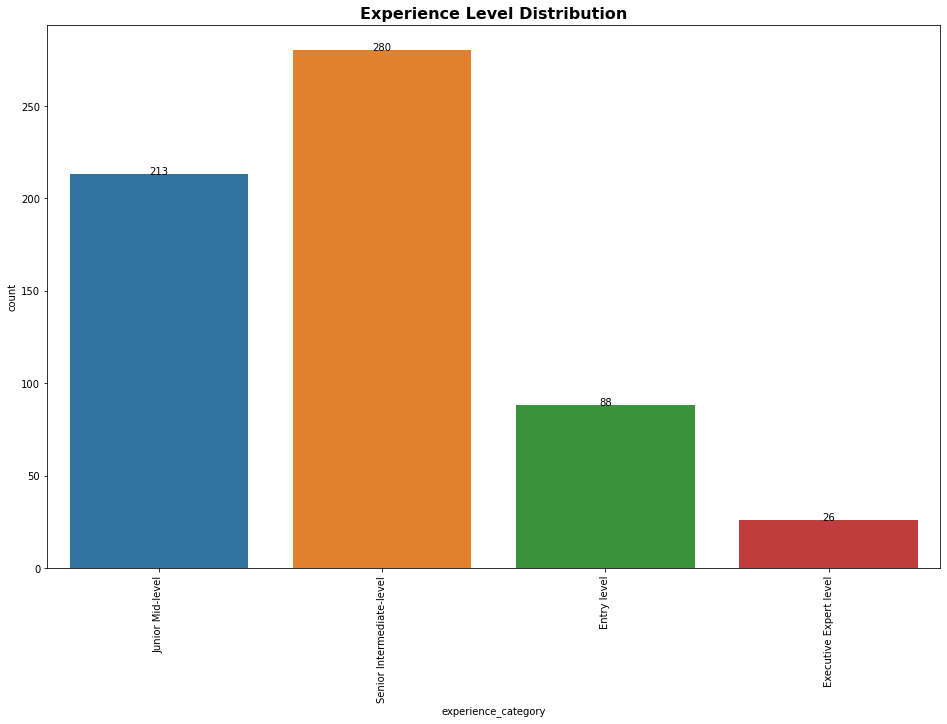

In [60]:


fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ='experience_category', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Experience Level Distribution', weight='bold', fontsize = 16)

#### Job Titles

In [61]:
df.job_title.value_counts().sort_values(ascending=False)[:10]

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Data Analytics Manager          7
Name: job_title, dtype: int64

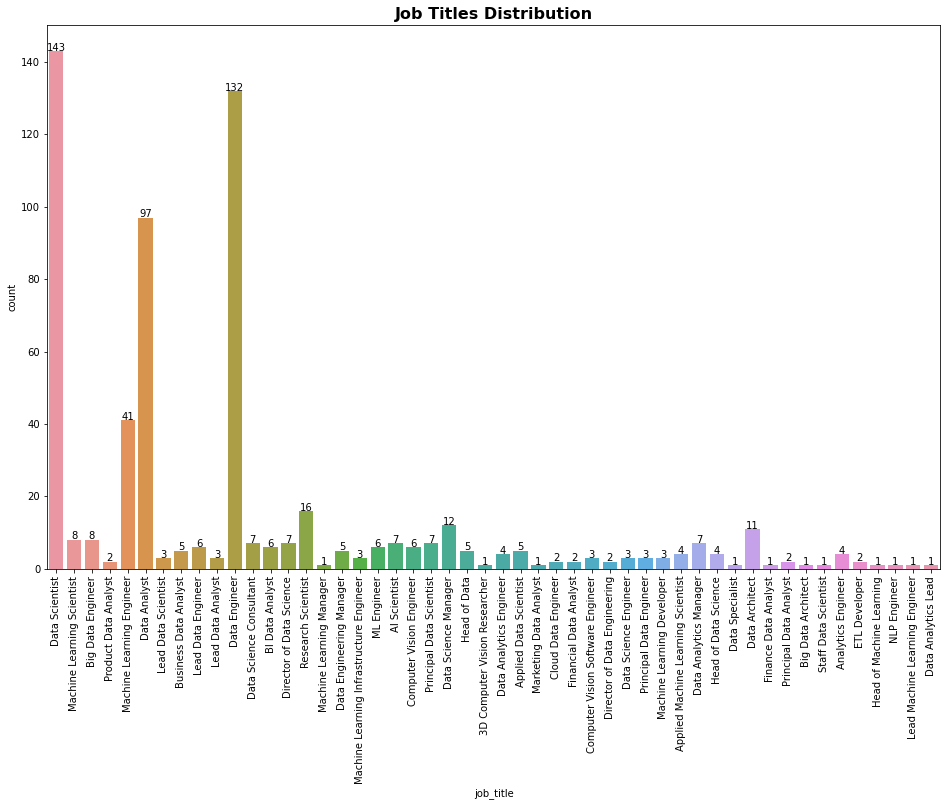

In [62]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ='job_title', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Job Titles Distribution', weight='bold', fontsize = 16)

#### Employment Type

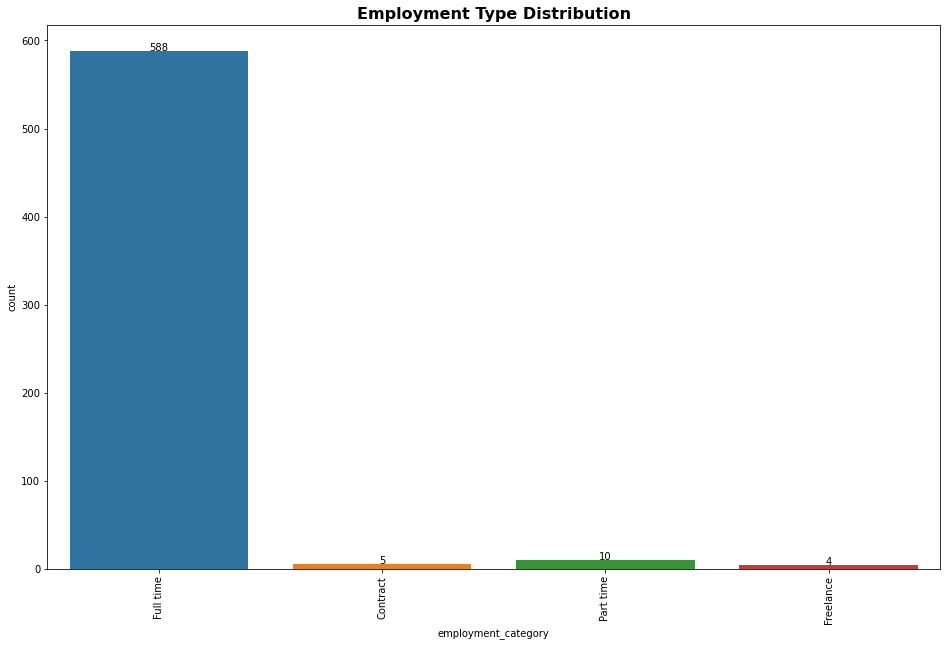

In [63]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ='employment_category', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Employment Type Distribution', weight='bold', fontsize = 16)

#### Employee Residence & Company Location

In [64]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,employment_category,remote_category,company_size_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Junior Mid-level,Full time,No remote,Large
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Senior Intermediate-level,Full time,No remote,Small
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Senior Intermediate-level,Full time,partially remote,Medium
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Junior Mid-level,Full time,No remote,Small
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Senior Intermediate-level,Full time,partially remote,Large


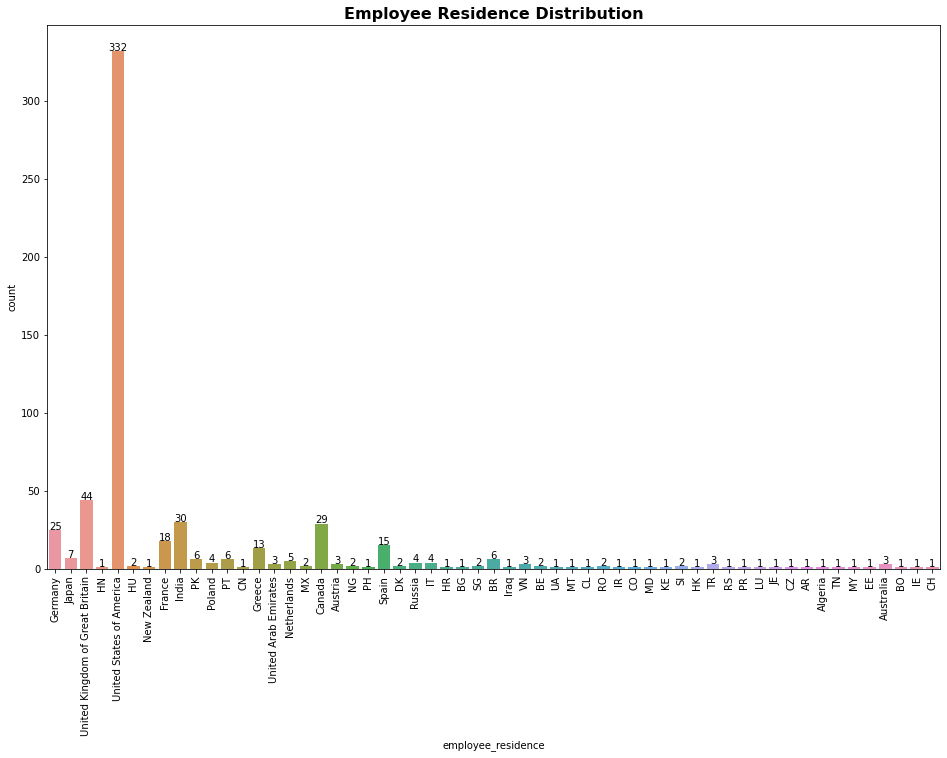

In [65]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ='employee_residence', data = cld)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Employee Residence Distribution', weight='bold', fontsize = 16)

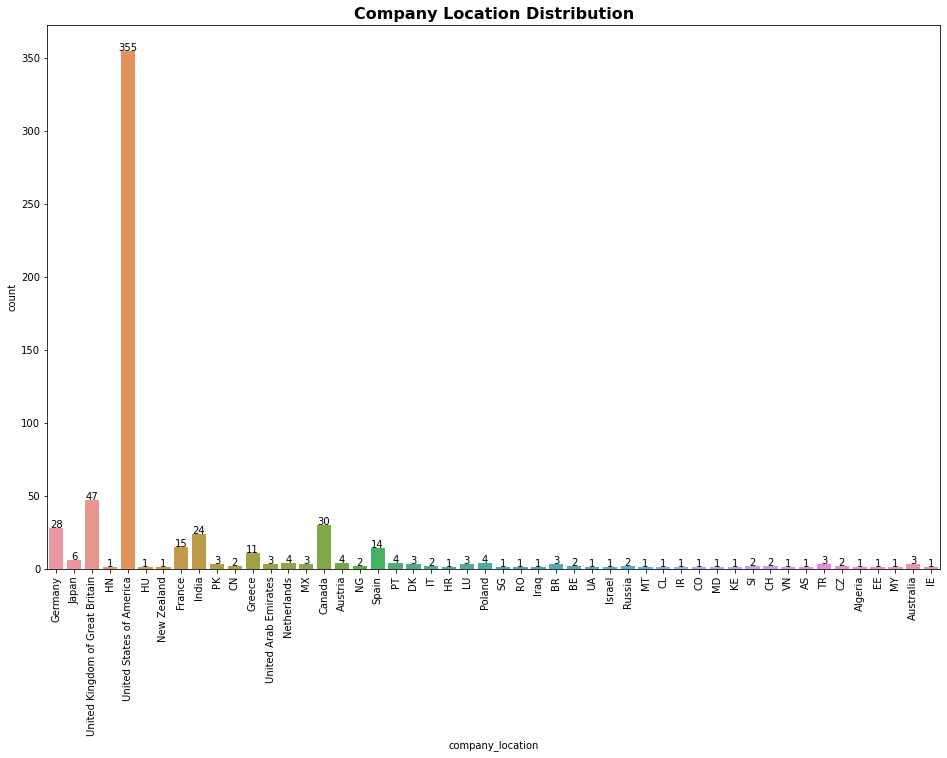

In [66]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ='company_location', data = cld)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Company Location Distribution', weight='bold', fontsize = 16)

<AxesSubplot:ylabel='employee_residence,company_location'>

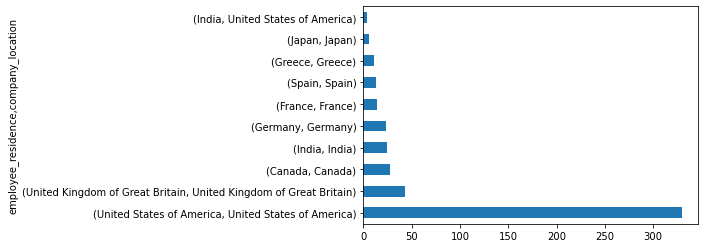

In [67]:
cld[['employee_residence', 'company_location']].value_counts().sort_values(ascending=False)[:10].plot.barh()

In [68]:
cld[['employee_residence', 'company_location']].value_counts().sort_values(ascending=False)[:10]

employee_residence               company_location               
United States of America         United States of America           330
United Kingdom of Great Britain  United Kingdom of Great Britain     43
Canada                           Canada                              28
India                            India                               24
Germany                          Germany                             23
France                           France                              14
Spain                            Spain                               13
Greece                           Greece                              11
Japan                            Japan                                6
India                            United States of America             4
dtype: int64

#### Company Size

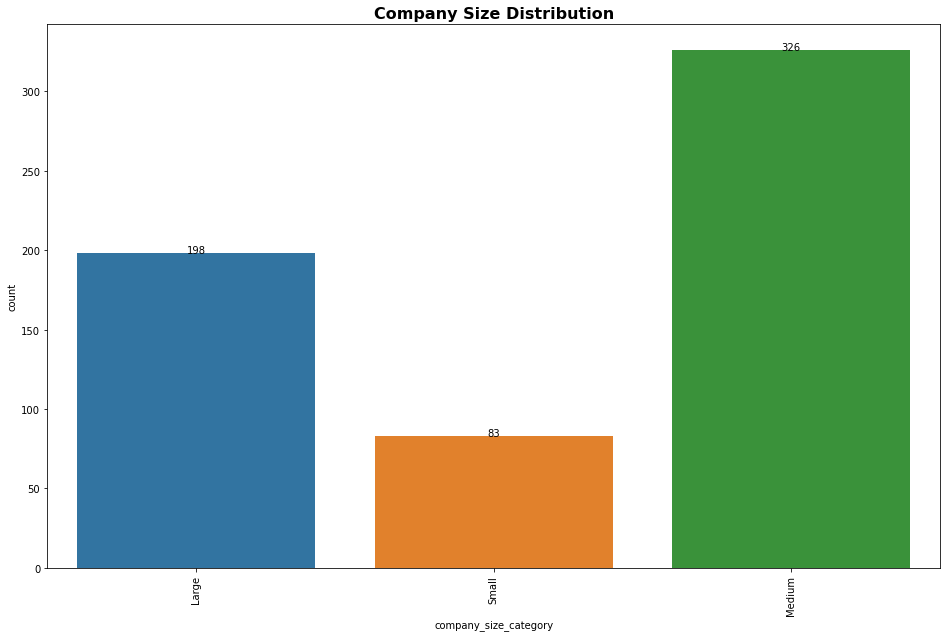

In [69]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ='company_size_category', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Company Size Distribution', weight='bold', fontsize = 16)

#### Work Year

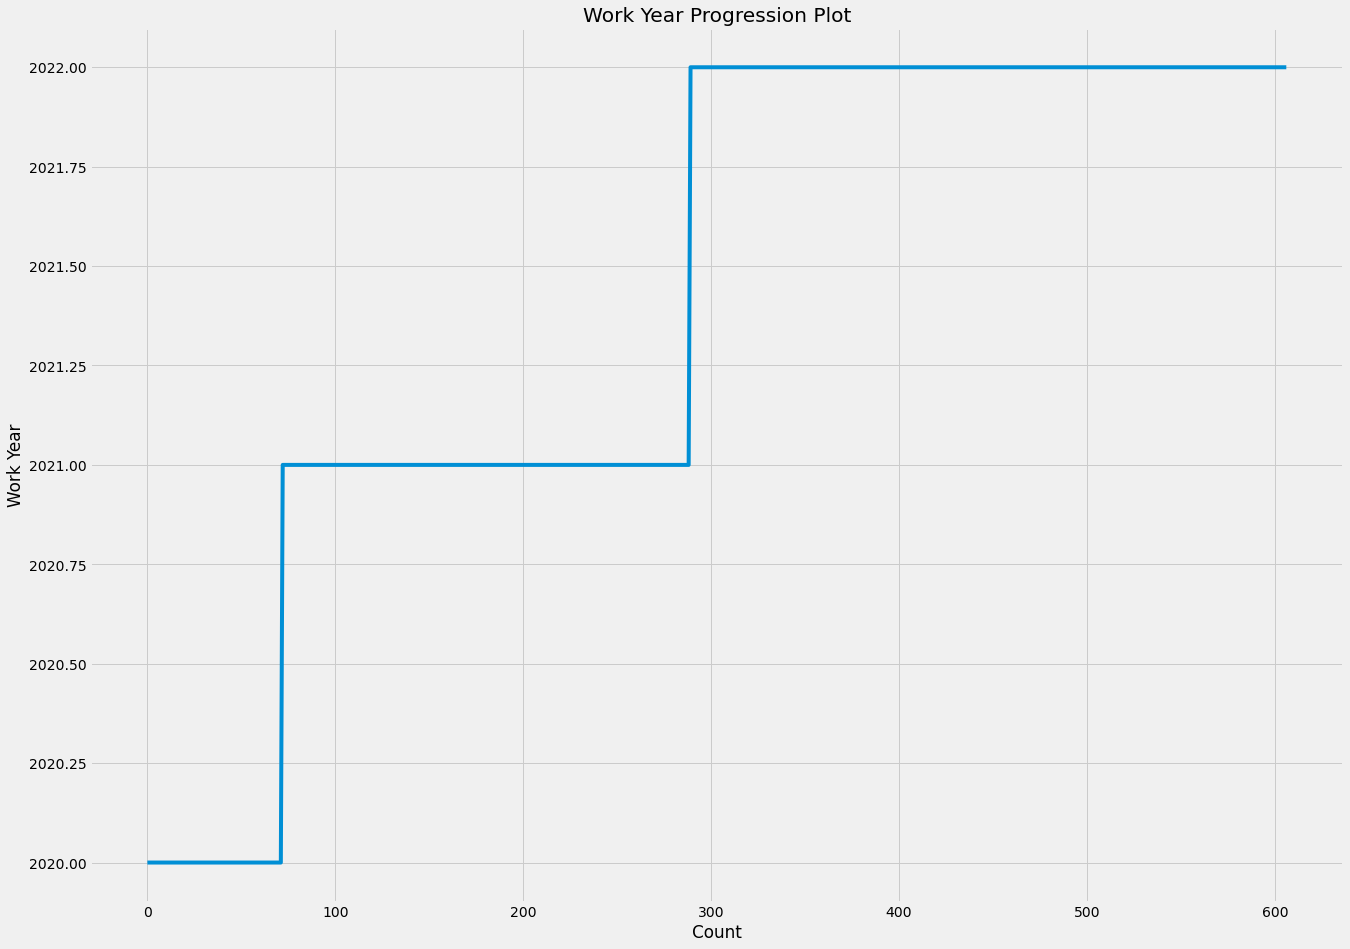

In [70]:
#Drawing a line plot to visualize the time_step column distribution
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(20, 15))
 
# Labelling the axes and setting
# a title
plt.xlabel("Count")
plt.ylabel("Work Year")
plt.title("Work Year Progression Plot")
 
# plotting the "A" column alone
plt.plot(df["work_year"])

In [71]:
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

#### Salary In USD

In [72]:
# Total salary by salary currency
df_salary_currency = df['salary'].groupby(df.salary_currency).sum()
df_salary_currency

#this gives a perspective to the total amount of money paid in each currency

salary_currency
AUD      241000
BRL      171600
CAD     2214500
CHF      115000
CLP    30400000
CNY      539000
DKK      480000
EUR     5441699
GBP     2712856
HUF    22000000
INR    55734997
JPY    19950000
MXN      778000
PLN      440000
SGD      280000
TRY      538000
USD    54631386
Name: salary, dtype: int64

In [73]:
# Total Salary for the year
df.salary_in_usd.sum()

68164807

So the total sum of money accrued over the 3 years data by data scientist affiliate jobs is $68,164,807.

In [74]:
df.salary_in_usd.max()

600000

In [75]:
df.salary_in_usd.min()

2859

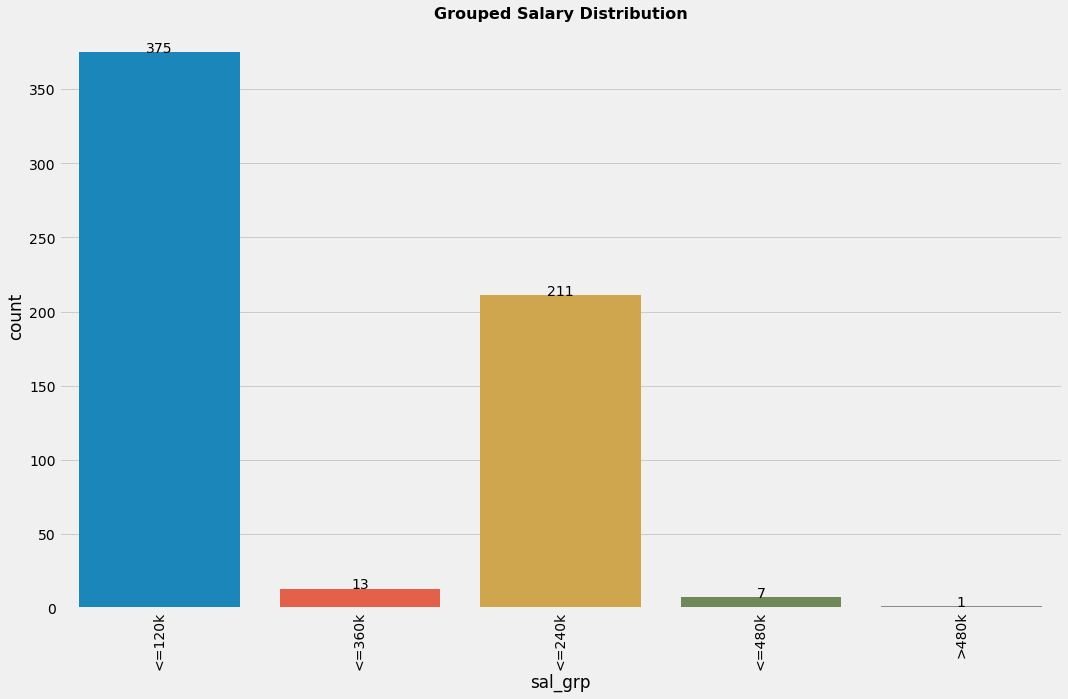

In [76]:
# Visualising Salary in USD

def sal_usd(salary_in_usd):
    if salary_in_usd <= 120000:
        return "<=120k"
    elif salary_in_usd <=240000:
        return "<=240k"
    elif salary_in_usd <=360000:
        return "<=360k"
    elif salary_in_usd <= 480000:
        return "<=480k"
    else: 
        return ">480k"

    
# Create a new column for salary category
df["sal_grp"] = df["salary_in_usd"].apply(sal_usd)

# Display values for each category
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="sal_grp", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Grouped Salary Distribution', weight='bold').set_fontsize(16)

#### Remote Ratio

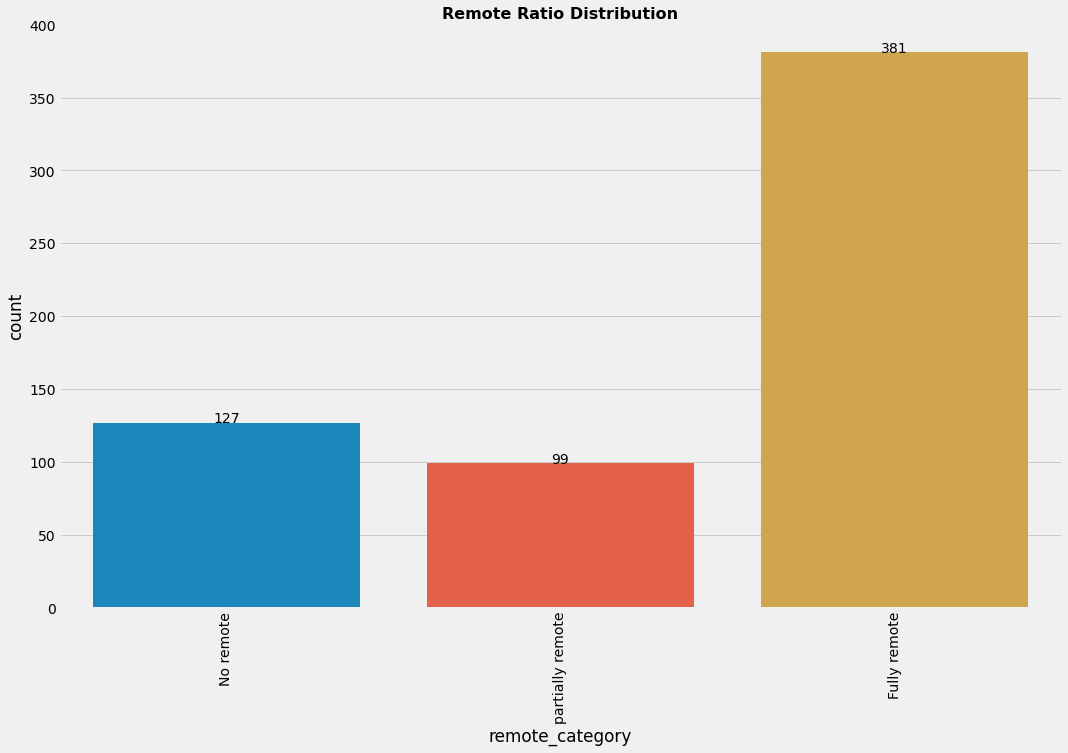

In [77]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="remote_category", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Remote Ratio Distribution', weight='bold').set_fontsize(16)

#### Remote Ratio vs Work Year

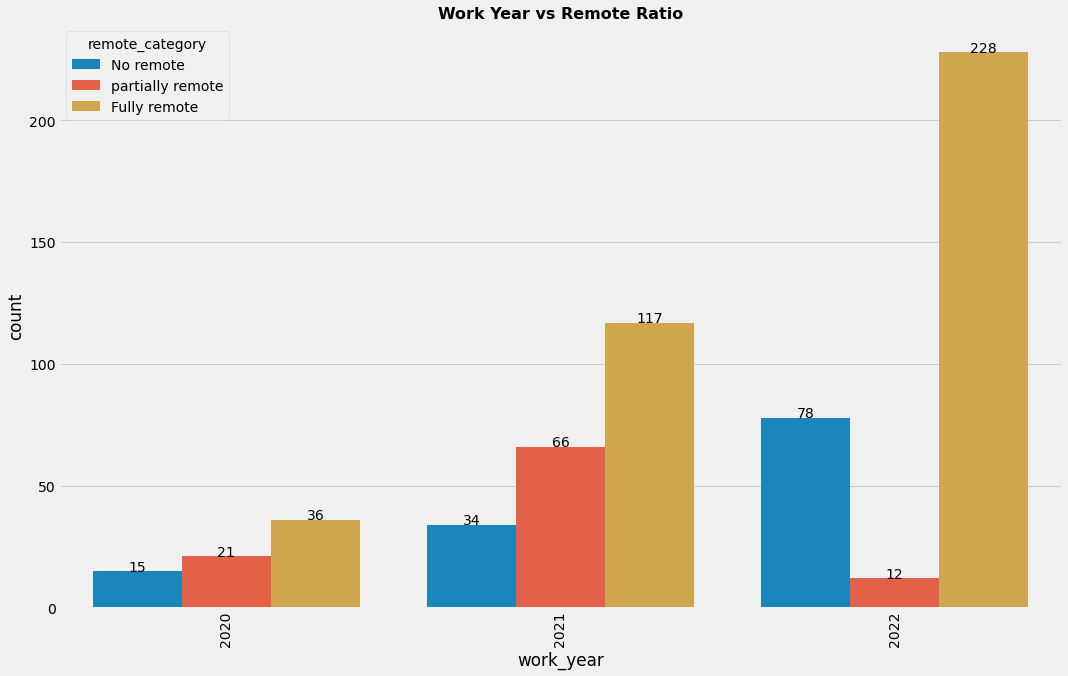

In [78]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ='work_year', hue='remote_category', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Work Year vs Remote Ratio', weight='bold', fontsize = 16)

#### Work Year and Job Title

In [126]:
cld[['job_title','work_year']].value_counts().sort_values(ascending=False)[:10]

job_title                  work_year
Data Engineer              2022         89
Data Scientist             2022         77
Data Analyst               2022         73
Data Scientist             2021         45
Data Engineer              2021         32
Data Scientist             2020         21
Machine Learning Engineer  2021         18
                           2022         18
Data Analyst               2021         17
Data Engineer              2020         11
dtype: int64

<AxesSubplot:ylabel='job_title,work_year'>

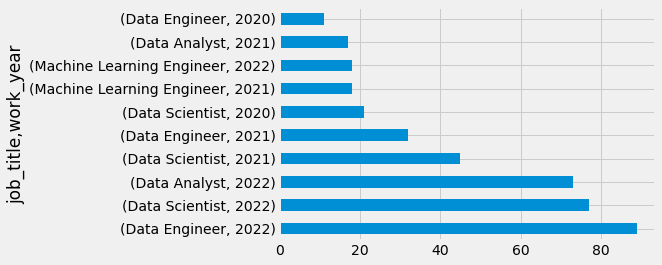

In [127]:
cld[['job_title','work_year']].value_counts().sort_values(ascending=False)[:10].plot.barh()

In [135]:
Data_Scientist = cld[['job_title','work_year']].value_counts().sort_values(ascending=False)['Data Scientist']
Data_Scientist

work_year
2022    77
2021    45
2020    21
dtype: int64

<AxesSubplot:ylabel='work_year'>

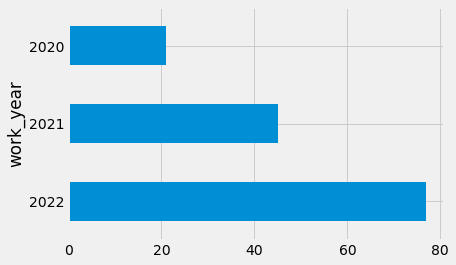

In [136]:
Data_Scientist.plot.barh()

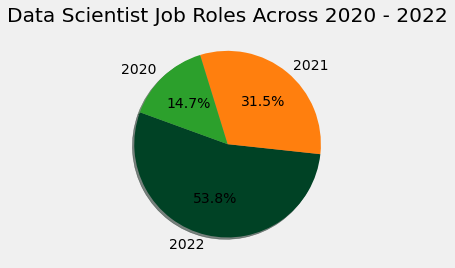

In [137]:
# Data Scientist Jobs vs Work Year
colors = ['#004225', '#ff7f0e','#2ca02c']
explode = (0.1, 0, 0, 0, 0)
plt.pie(Data_Scientist, labels = Data_Scientist.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Data Scientist Job Roles Across 2020-2022')

plt.show()

### More In-depth Experience Level Analysis

####  Employment Type by Experience Level

In [80]:
df[['employment_category', 'experience_category']].value_counts()

employment_category  experience_category      
Full time            Senior Intermediate-level    278
                     Junior Mid-level             206
                     Entry level                   79
                     Executive Expert level        25
Part time            Entry level                    7
Freelance            Junior Mid-level               3
Part time            Junior Mid-level               3
Contract             Entry level                    2
                     Executive Expert level         1
                     Junior Mid-level               1
                     Senior Intermediate-level      1
Freelance            Senior Intermediate-level      1
dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


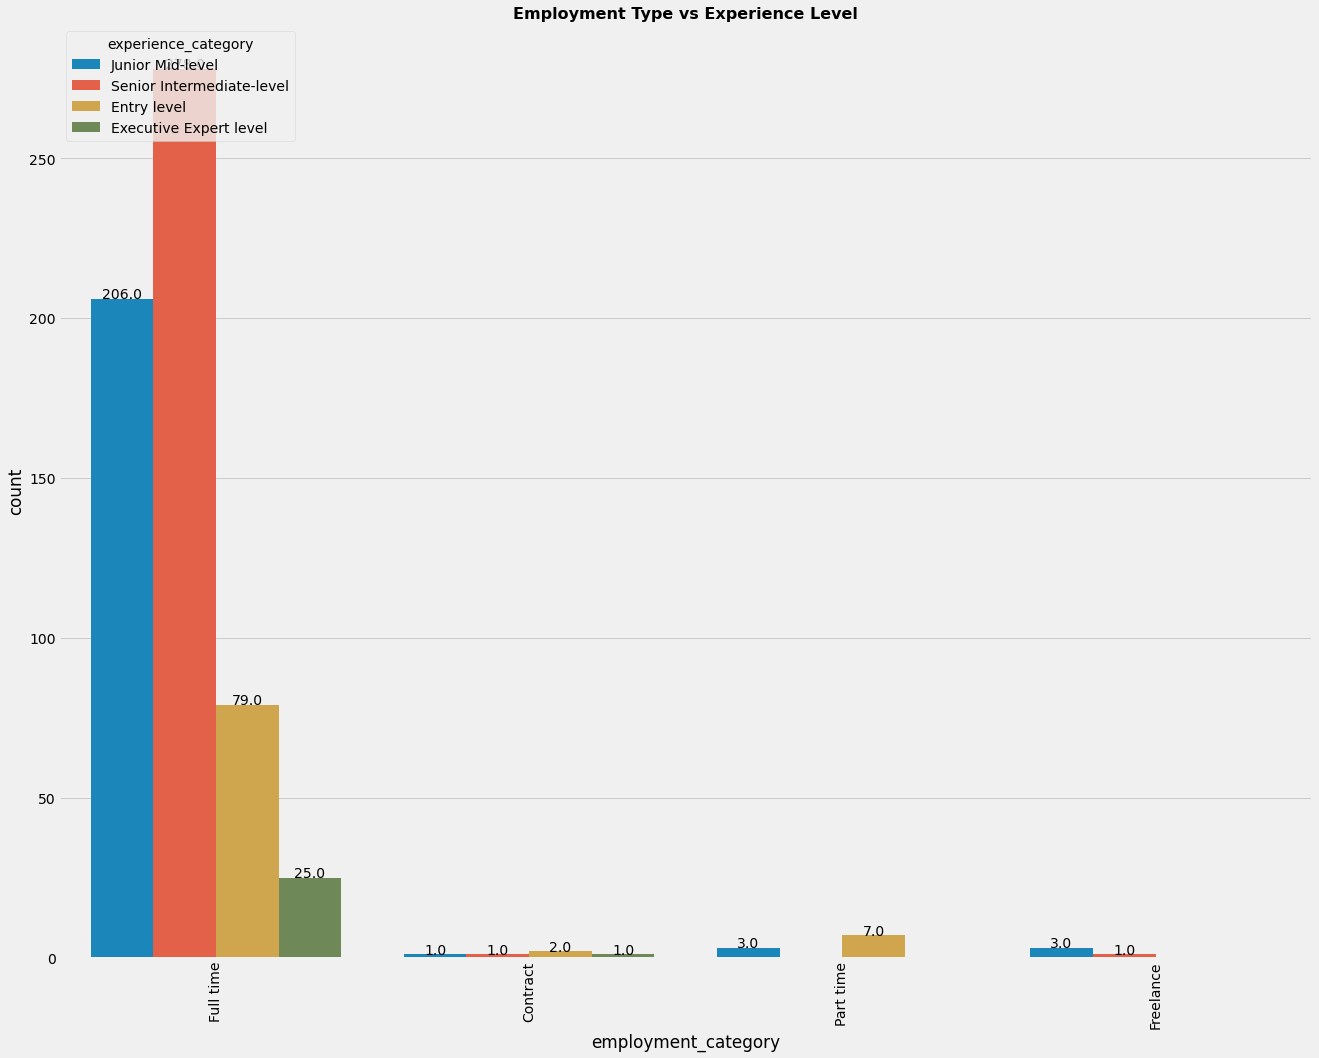

In [81]:
fig, ax1 = plt.subplots(figsize = (20,16))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x='employment_category', hue ='experience_category', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Employment Type vs Experience Level', weight='bold', fontsize = 16)




#### Experience Level and Job Titles

In [82]:
df[['experience_category','job_title']].value_counts()

experience_category        job_title               
Senior Intermediate-level  Data Engineer               63
                           Data Scientist              61
Junior Mid-level           Data Scientist              60
Senior Intermediate-level  Data Analyst                54
Junior Mid-level           Data Engineer               53
                                                       ..
                           NLP Engineer                 1
                           Principal Data Analyst       1
                           Principal Data Scientist     1
Senior Intermediate-level  AI Scientist                 1
                           Staff Data Scientist         1
Length: 105, dtype: int64

In [83]:
#Top 3 Job Title
df.job_title.value_counts().nlargest(3)

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

In [84]:
jb3 = (df.groupby('job_title').experience_category.count().sort_values(ascending=False)[:3])
jb3 

job_title
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: experience_category, dtype: int64

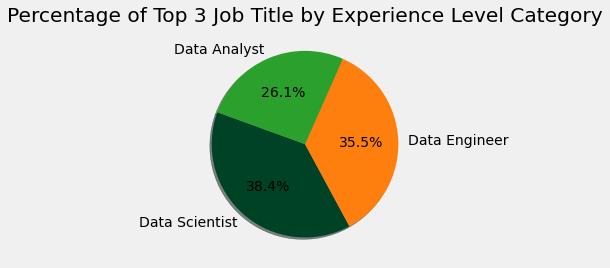

In [85]:
# Top 3 Job Title by Experience Level
colors = ['#004225', '#ff7f0e','#2ca02c']
explode = (0.1, 0, 0, 0, 0)
plt.pie(jb3, labels = jb3.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Percentage of Top 3 Job Title by Experience Level Category')

plt.show()

#### Company Size vs Experience Level

In [86]:
df.groupby(['experience_category','company_size_category']).company_size_category.count().sort_values(ascending=False)[:10]


experience_category        company_size_category
Senior Intermediate-level  Medium                   186
Junior Mid-level           Medium                    98
                           Large                     86
Senior Intermediate-level  Large                     72
Entry level                Medium                    30
                           Large                     29
                           Small                     29
Junior Mid-level           Small                     29
Senior Intermediate-level  Small                     22
Executive Expert level     Medium                    12
Name: company_size_category, dtype: int64

In [87]:
ck = df.groupby(['experience_category','company_size_category']).count()
ck

work_year  experience_level  \
experience_category       company_size_category                                
Entry level               Large                         29                29   
                          Medium                        30                30   
                          Small                         29                29   
Executive Expert level    Large                         11                11   
                          Medium                        12                12   
                          Small                          3                 3   
Junior Mid-level          Large                         86                86   
                          Medium                        98                98   
                          Small                         29                29   
Senior Intermediate-level Large                         72                72   
                          Medium                       186               186   
                          Small                         22                22   

                                                 employment_type  job_title  \
experience_category       company_size_category                               
Entry level               Large                               29         29   
                          Medium                              30         30   
                          Small                               29         29   
Executive Expert level    Large                               11         11   
                          Medium                              12         12   
                          Small                                3          3   
Junior Mid-level          Large                               86         86   
                          Medium                              98         98   
                          Small                               29         29   
Senior Intermediate-level Large                               72         72   
                          Medium                             186        186   
                          Small                               22         22   

                                                 salary  salary_currency  \
experience_category       company_size_category                            
Entry level               Large                      29               29   
                          Medium                     30               30   
                          Small                      29               29   
Executive Expert level    Large                      11               11   
                          Medium                     12               12   
                          Small                       3                3   
Junior Mid-level          Large                      86               86   
                          Medium                     98               98   
                          Small                      29               29   
Senior Intermediate-level Large                      72               72   
                          Medium                    186              186   
                          Small                      22               22   

                                                 salary_in_usd  \
experience_category       company_size_category                  
Entry level               Large                             29   
                          Medium                            30   
                          Small                             29   
Executive Expert level    Large                             11   
                          Medium                            12   
                          Small                              3   
Junior Mid-level          Large                             86   
                          Medium                            98   
                          Small                             29   
Senior Intermediate-level Larg

In [88]:
ck.drop(ck.columns[[0,2,3,4,5,6,7, 8,9,11,12,13]], axis = 1, inplace=True)

In [89]:
ck

experience_level  \
experience_category       company_size_category                     
Entry level               Large                                29   
                          Medium                               30   
                          Small                                29   
Executive Expert level    Large                                11   
                          Medium                               12   
                          Small                                 3   
Junior Mid-level          Large                                86   
                          Medium                               98   
                          Small                                29   
Senior Intermediate-level Large                                72   
                          Medium                              186   
                          Small                                22   

                                                 company_size  
experience_category       company_size_category                
Entry level               Large                            29  
                          Medium                           30  
                          Small                            29  
Executive Expert level    Large                            11  
                          Medium                           12  
                          Small                             3  
Junior Mid-level          Large                            86  
                          Medium                           98  
                          Small                            29  
Senior Intermediate-level Large                            72  
                          Medium                          186  
                          Small                            22

<AxesSubplot:ylabel='experience_category,company_size_category'>

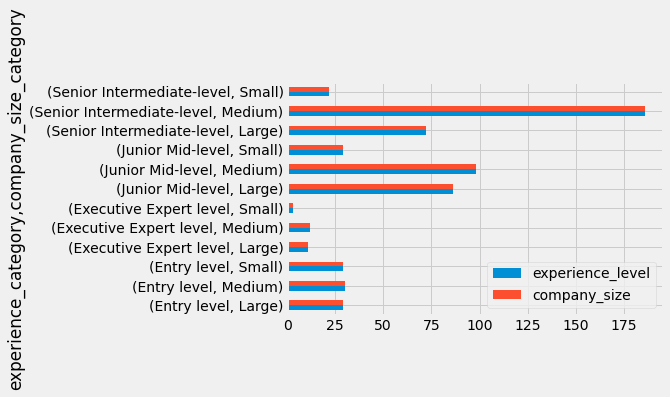

In [90]:
ck.plot.barh()

### Company Location Analysis

In [91]:
cd = (cld.groupby('company_location').experience_category.count().sort_values(ascending=False)[:10])
cd 

company_location
United States of America           355
United Kingdom of Great Britain     47
Canada                              30
Germany                             28
India                               24
France                              15
Spain                               14
Greece                              11
Japan                                6
Poland                               4
Name: experience_category, dtype: int64

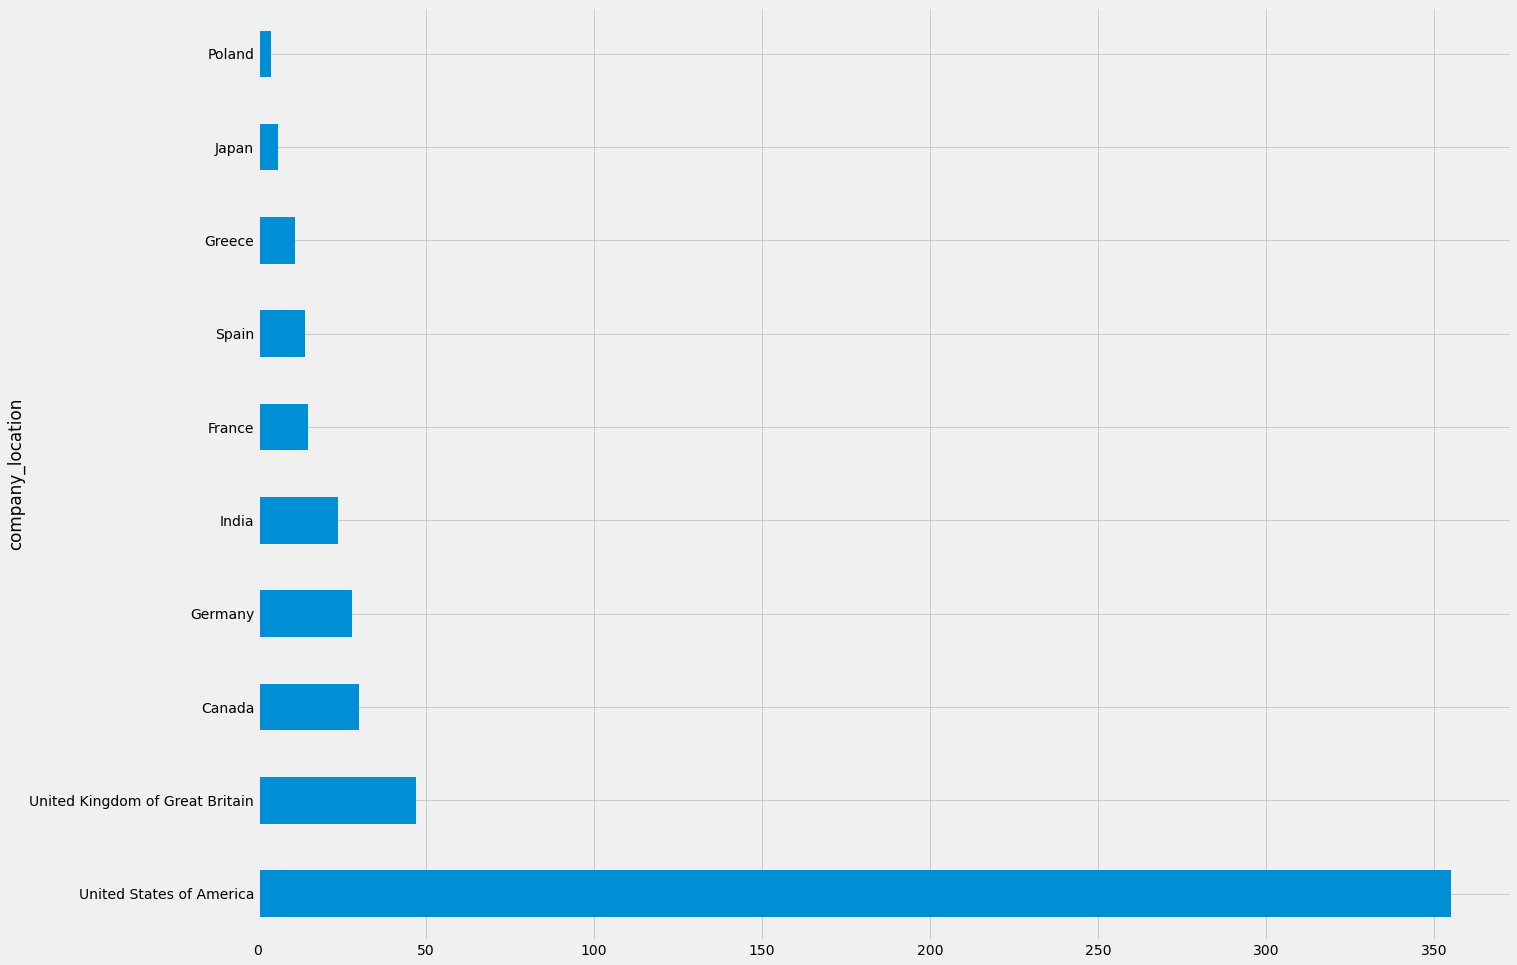

In [92]:
plt.figure(figsize=(20,16))
ax = cd.plot.barh()

#### Company Location & Job Title

In [183]:
ccc = cld.groupby(['job_title']).company_location.value_counts().nlargest(5).sort_values(ascending=False)
ccc

job_title                  company_location               
Data Engineer              United States of America           85
Data Scientist             United States of America           84
Data Analyst               United States of America           71
Data Engineer              United Kingdom of Great Britain    20
Machine Learning Engineer  United States of America           16
Name: company_location, dtype: int64

<AxesSubplot:ylabel='job_title,company_location'>

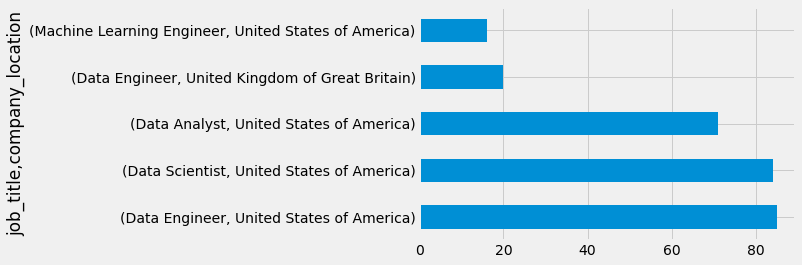

In [206]:
ccc.plot.barh()

In [203]:
cdc = cld.groupby(['job_title']).company_location.value_counts().sort_values(ascending=False)
cdc

job_title                  company_location               
Data Engineer              United States of America           85
Data Scientist             United States of America           84
Data Analyst               United States of America           71
Data Engineer              United Kingdom of Great Britain    20
Machine Learning Engineer  United States of America           16
                                                              ..
Data Science Consultant    India                               1
Data Engineering Manager   Spain                               1
                           Germany                             1
Data Engineer              Poland                              1
Staff Data Scientist       United States of America            1
Name: company_location, Length: 179, dtype: int64

In [204]:
cdc.tail(20)['Data Scientist']

company_location
Malaysia      1
Luxembourg    1
Israel        1
Hungary       1
Chile         1
Brazil        1
Australia     1
Algeria       1
Name: company_location, dtype: int64

<AxesSubplot:ylabel='company_location'>

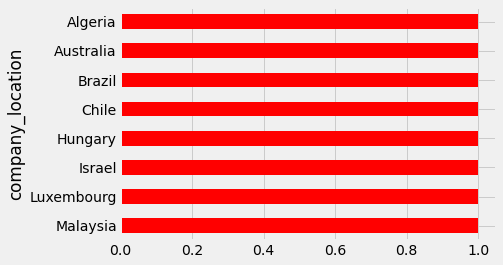

In [207]:
cdc.tail(20)['Data Scientist'].plot.barh(color='red')

<AxesSubplot:ylabel='company_location'>

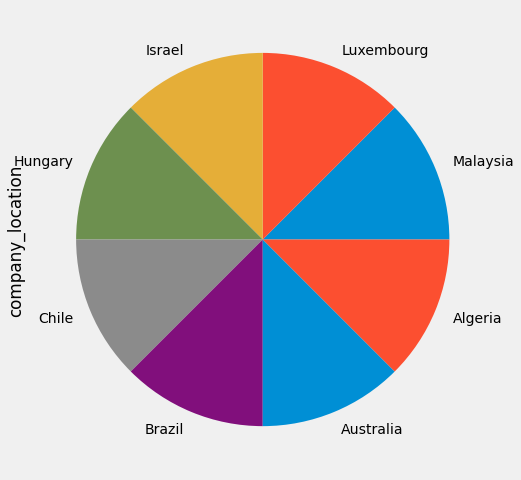

In [212]:
plt.figure(figsize=(16,8))
cdc.tail(20)['Data Scientist'].plot.pie()

### Salary Analysis

- Because the salaries were in various currencies, it only makes sense to use the dollar conversion salary presented on the table.

- Also, because there is a long list of salary amounts and very few are same amount, it is better to use the grouped salary ratings.

#### Salary vs Work Year

In [93]:
df.groupby(['sal_grp','work_year']).sal_grp.count()

sal_grp  work_year
<=120k   2020          57
         2021         157
         2022         161
<=240k   2020          10
         2021          52
         2022         149
<=360k   2020           3
         2021           4
         2022           6
<=480k   2020           2
         2021           3
         2022           2
>480k    2021           1
Name: sal_grp, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


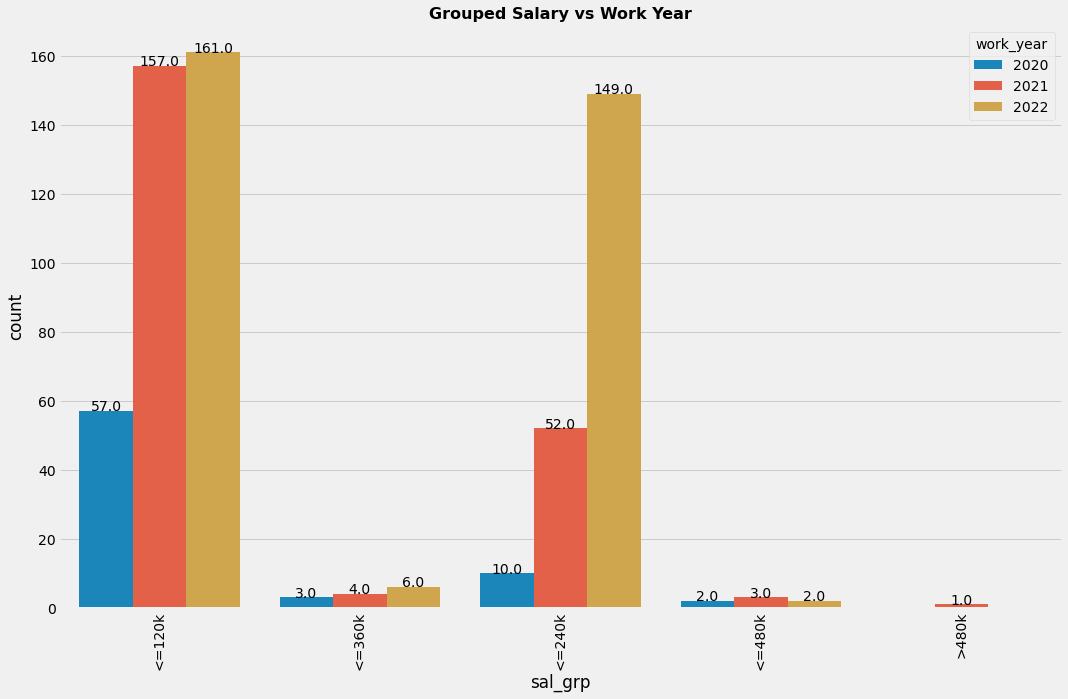

In [94]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x='sal_grp', hue ='work_year', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Grouped Salary vs Work Year', weight='bold', fontsize = 16)

In [95]:
df.groupby(['work_year']).salary_in_usd.value_counts().sort_values(ascending=False)[:10]

work_year  salary_in_usd
2022       100000           8
           120000           8
           130000           7
2021       100000           6
2022       135000           6
           140000           6
2021       200000           6
           150000           6
2022       90320            5
           150000           5
Name: salary_in_usd, dtype: int64

In [96]:
df.salary_in_usd.max()

600000

In [97]:
# Using the element in one column to find another element in another column on the same table
suj = df.query('salary_in_usd == 600000')['job_title']
suj

252    Principal Data Engineer
Name: job_title, dtype: object

#### Salary vs Experience Level

In [98]:
df.groupby(['sal_grp','experience_category']).sal_grp.count()

sal_grp  experience_category      
<=120k   Entry level                   82
         Executive Expert level         6
         Junior Mid-level             172
         Senior Intermediate-level    115
<=240k   Entry level                    5
         Executive Expert level        14
         Junior Mid-level              36
         Senior Intermediate-level    156
<=360k   Entry level                    1
         Executive Expert level         4
         Junior Mid-level               2
         Senior Intermediate-level      6
<=480k   Executive Expert level         1
         Junior Mid-level               3
         Senior Intermediate-level      3
>480k    Executive Expert level         1
Name: sal_grp, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


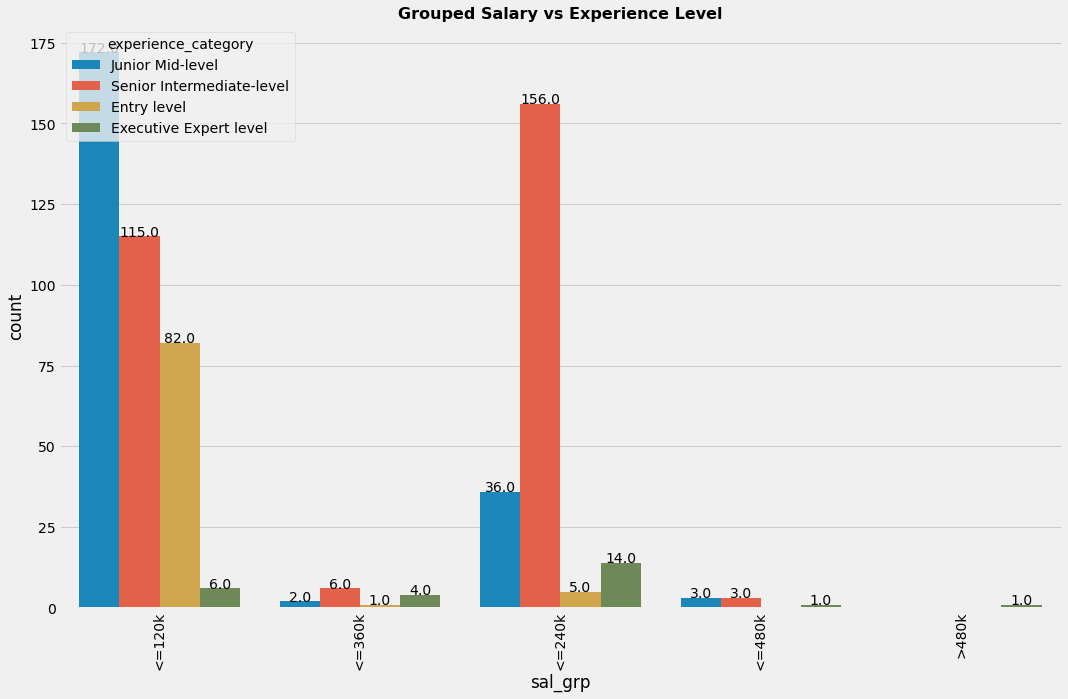

In [99]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x='sal_grp', hue ='experience_category', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Grouped Salary vs Experience Level', weight='bold', fontsize = 16)

In [100]:
df.groupby(["experience_category"])["salary_in_usd"].nlargest(1)

experience_category           
Entry level                37     250000
Executive Expert level     252    600000
Junior Mid-level           33     450000
Senior Intermediate-level  63     412000
Name: salary_in_usd, dtype: int64

In [101]:
df.query('index == 37')['job_title']

37    Machine Learning Engineer
Name: job_title, dtype: object

<AxesSubplot:ylabel='experience_category,None'>

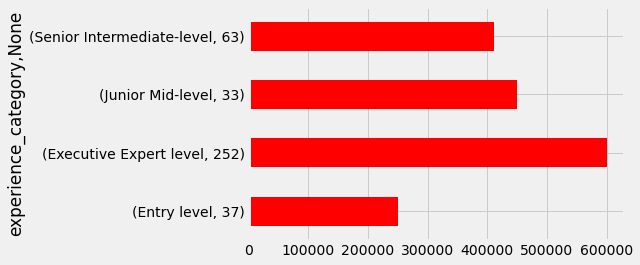

In [102]:
df.groupby(["experience_category"])["salary_in_usd"].nlargest(1).plot.barh(color = 'red')

#### Salary Group vs Company Size

In [103]:
df.groupby(['sal_grp','company_size_category']).sal_grp.count()

sal_grp  company_size_category
<=120k   Large                    123
         Medium                   180
         Small                     72
<=240k   Large                     64
         Medium                   139
         Small                      8
<=360k   Large                      5
         Medium                     6
         Small                      2
<=480k   Large                      5
         Medium                     1
         Small                      1
>480k    Large                      1
Name: sal_grp, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


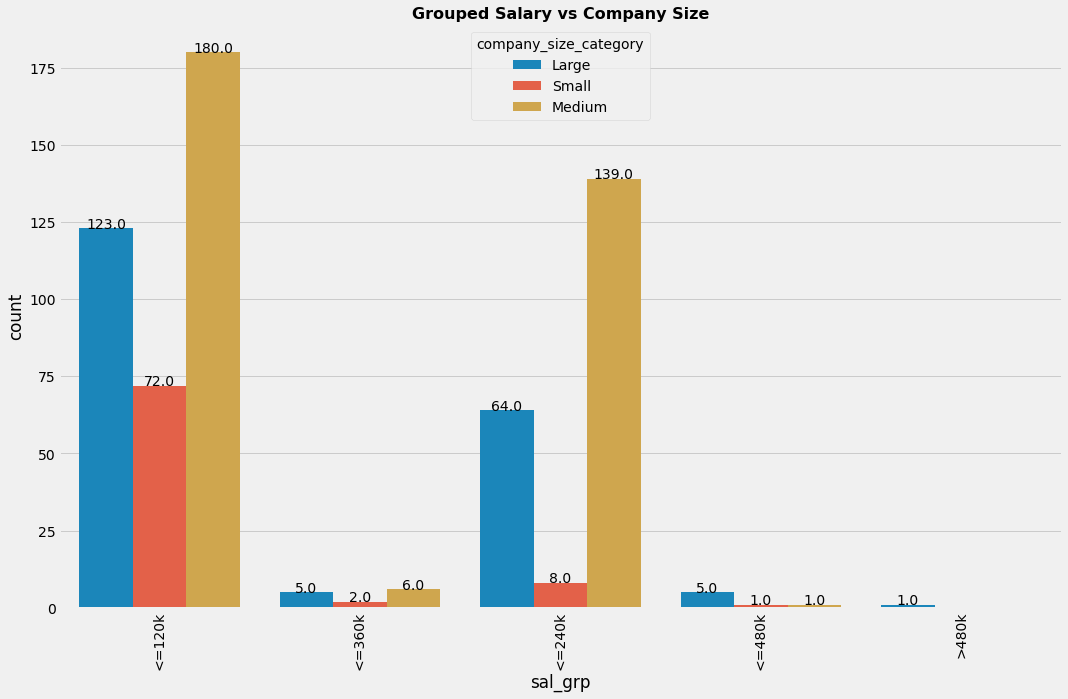

In [104]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x='sal_grp', hue ='company_size_category', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Grouped Salary vs Company Size', weight='bold', fontsize = 16)

#### Highest Salaries vs Job Title

In [105]:
dj = df.groupby(['job_title','salary_in_usd']).salary_in_usd.count().sort_values(ascending=False)[:10]
dj

job_title       salary_in_usd
Data Scientist  140000           6
                100000           5
Data Analyst    90320            5
                80000            4
Data Scientist  210000           4
Data Analyst    112900           4
                135000           4
Data Engineer   78526            4
                132320           3
                100000           3
Name: salary_in_usd, dtype: int64

<AxesSubplot:ylabel='job_title,salary_in_usd'>

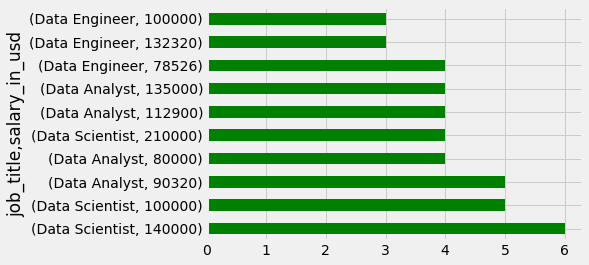

In [106]:
dj.plot.barh(color='green')

In [107]:
df.salary_in_usd.max()

600000

In [108]:
df.salary_in_usd.min()

2859

In [109]:
cid = df.query('salary_in_usd == 600000')[['job_title','experience_category','employment_category']]
cid

,job_title,experience_category,employment_category
252,Principal Data Engineer,Executive Expert level,Full time


In [170]:
eid = df.query('salary_in_usd == 2859')[['job_title','experience_category','employment_category','work_year']]
eid

,job_title,experience_category,employment_category,work_year
176,Data Scientist,Junior Mid-level,Full time,2021


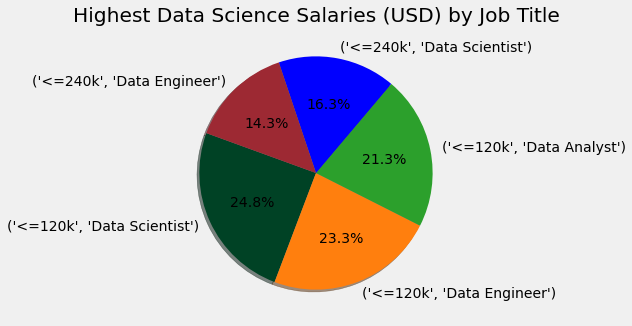

In [158]:
plt.figure(figsize=(10,5))

colors = ['#004225', '#ff7f0e','#2ca02c','#0000ff','#9d2933','#00d3ae','#82943f','#dfe7f3','#9a5d39','#ffff33']
explode = (0.1, 0, 0, 0, 0)
plt.pie(jss, labels = jss.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Highest Data Science Salaries (USD) by Job Title')

plt.show()

In [168]:
jss = df.groupby(['sal_grp','job_title']).sal_grp.count().nlargest(5).sort_values(ascending=False)
jss

sal_grp  job_title     
<=120k   Data Scientist    85
         Data Engineer     80
         Data Analyst      73
<=240k   Data Scientist    56
         Data Engineer     49
Name: sal_grp, dtype: int64

<AxesSubplot:ylabel='sal_grp,job_title'>

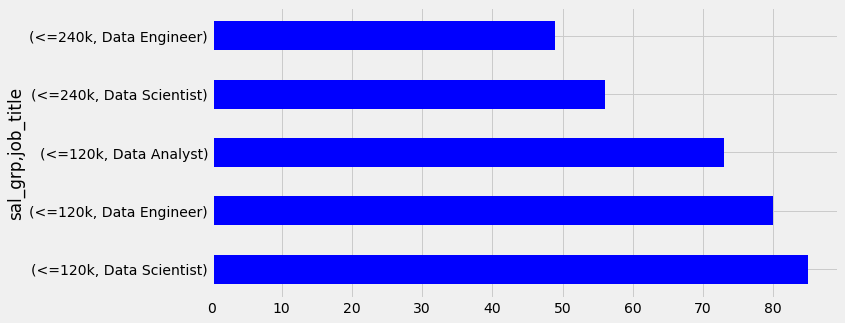

In [169]:
plt.figure(figsize=(10,5))
jss.plot.barh(color='#0000ff')

#### Average Salary (USD) by Company Location

In [112]:
ascl = (cld.groupby(['company_location']).salary_in_usd.mean().sort_values(ascending=False)[:10])
ascl 

company_location
Russia                      157500.000000
United States of America    144055.261972
New Zealand                 125000.000000
Israel                      119059.000000
Japan                       114127.333333
Australia                   108042.666667
United Arab Emirates        100000.000000
Algeria                     100000.000000
Iraq                        100000.000000
Canada                       99823.733333
Name: salary_in_usd, dtype: float64

<AxesSubplot:ylabel='company_location'>

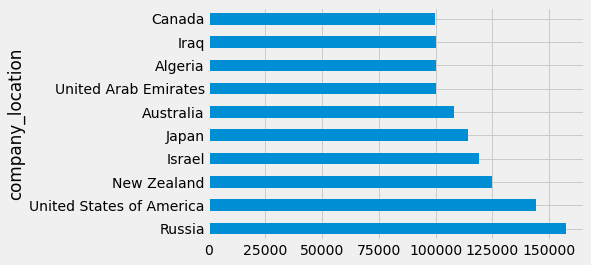

In [113]:
ascl.plot.barh()

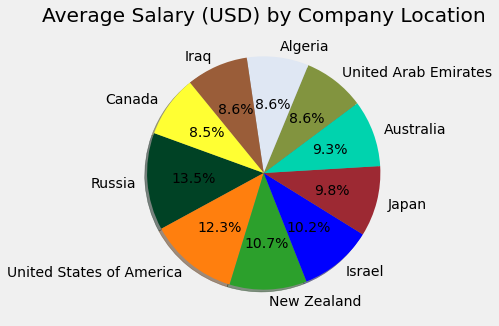

In [114]:
plt.figure(figsize=(10,5))

colors = ['#004225', '#ff7f0e','#2ca02c','#0000ff','#9d2933','#00d3ae','#82943f','#dfe7f3','#9a5d39','#ffff33']
#explode = (0.1, 0, 0, 0, 0)
plt.pie(ascl, labels = ascl.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Average Salary (USD) by Company Location')

plt.show()

#### Salary and Remote Ratio

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


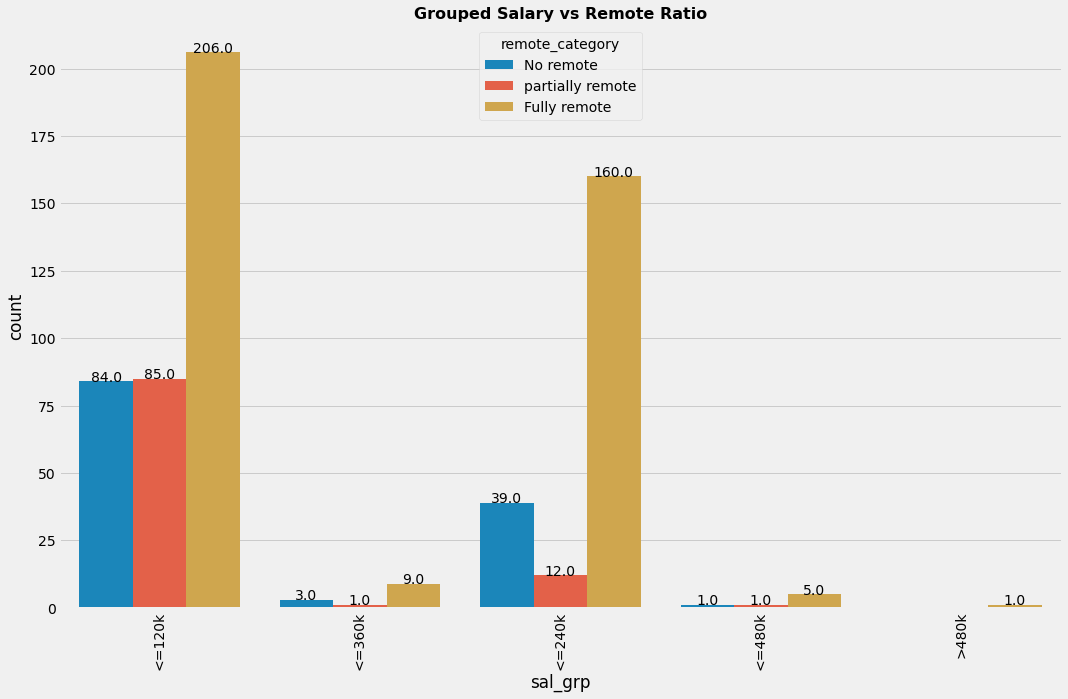

In [115]:
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x='sal_grp', hue ='remote_category', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Grouped Salary vs Remote Ratio', weight='bold', fontsize = 16)

#### Job Title and Remote Ratio

In [233]:
jrc = cld.groupby(['job_title']).remote_category.value_counts().sort_values(ascending=False)[:7]
jrc

job_title                  remote_category 
Data Engineer              Fully remote        93
Data Scientist             Fully remote        79
Data Analyst               Fully remote        70
Data Scientist             No remote           39
Data Engineer              No remote           27
Data Scientist             partially remote    25
Machine Learning Engineer  Fully remote        22
Name: remote_category, dtype: int64

In [236]:
rem_cat = jrc.tail(20)['Data Scientist']
rem_cat

remote_category
Fully remote        79
No remote           39
partially remote    25
Name: remote_category, dtype: int64

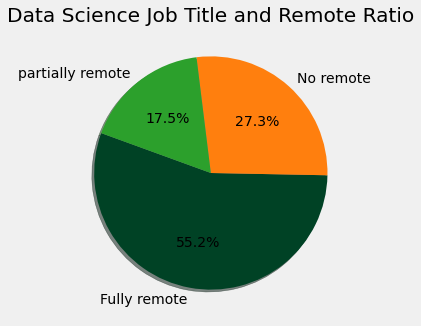

In [237]:
plt.figure(figsize=(10,5))

colors = ['#004225', '#ff7f0e','#2ca02c','#0000ff','#9d2933','#00d3ae','#82943f','#dfe7f3','#9a5d39','#ffff33']
#explode = (0.1, 0, 0, 0, 0)
plt.pie(rem_cat, labels = rem_cat.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Data Science Job Title and Remote Ratio')

plt.show()

### Summaries

- There are no null values in the dataset.
- The dataset has 607 rows and 15 columns.
- For some countries, we replaced the ISO codes acronym to the full country name.
- Removed the column title - 'Unnamed'.

### Insights

- Data Scientists is the topmost job title.


- Majority of the company locations are in the United States of America (US).


- Work Year (Job Title)
    - The number of data scientists moved from 21 in 2020, to 77 persons in 2022 which is a 267% rate increase in number of employment for that role.
    
    

- Work-Year (Remote Jobs)
    - Fully remote jobs increased by 225% in 2021 (36 to 117), and 533% in 2022 (36 to 228). 
    - Even though, the partially remote role increase in 2021, the was a 43% drop for such jobs in 2022 from the 2020 value. 
    - For jobs that are not remote at all, there was a steady rise.


- Work Year (Salary)
    - The money used was the dollar denomination.
    - The highest salary paid in the dollar denomination is 600,000 and it was done in the year 2021 to only one person. 
    - The 600,000 dollars salary was for a Principal Data Engineer.
    
    
- Experience Level (Company Size)
    - Medium sized organisations have the highest number of Senior Intermediate Level staff (186).
    
    
- Experience Level (Employment Level)
    - Companies with Full Time jobs employ all experience categories, with the topmost being the Senior Intermediate-Level followed by the Junior Mid-Level.
    - Full time companies also have more Entry Level staff than they do Experts.
    - There are no Entry Level or Executive Experts in freelance roles.
    
    
- Experience Level (Top 3 Job Titles)
    - The topmost job titles in their descending order of ranking are Data Scientist, Data Engineer, and the Data Analyst.
    
    
- Company Location (Experience Level)
    - The bulk of staff regardless of experience level are concentrated in the United States of America (US).
    
    
- Company Location
    - Most data scientists get jobs in the US, and the total number in this dataset was 84.
    - The countries with the least employment of data scientists are, Malaysia, Luxembourg, Israel, Hungary, Chile, Brazil, Australia, and Algeria.
    - Each having an employment figure of '1'; possibly because many companies in these countries have not appreciated the importance of harnessing and analysing data.
    
    
- Salary (Work Year)
    - The highest salary paid to anyone was in the year 2021 (600,000), to a Principal Data Engineer.
    - As the years progressed from 2020 towards 2022, the amount paid had a steady increase, though greater than, or equal to 240,000.
    

- Salary (Experience Level)
    - Junior Mid-Level and Entry Level staff mostly receive salaries <= 120,000.
    - The Senior Intermediate Level are more liable than others to receive a pay <= 240,000.
    - Only one Executive Expert in 2021 received a paycheck over 480k dollars; which was the Principal Data Engineer role aforementioned.


- Salary (Company Size)
    - Large organizations comfortably pay over 360,000 dollars, though they pay only a few people.
    - Salaries within the range of 240,000 dollars are easily afforded by small and medium organisations; though the ratio varies because more small companies pay <=120,000 and most medium companies disburse salaries <=240,000.


- Salary (Job Title)
    - The lowest salary is 2859 dollars, earned by a junior mid-level Data Scientist that is working full-time (2021).
    - The highest salary is paid to a Principal Data Engineer. This personnel was an Executive Expert.
    - Also, there are 85 data scientists being paid below <=120k, and 56 data scientists are paid within the range of 240k (<=240k dollars)
    

- Salary (Remote Ratio)
    - Fully Remote jobs pay much more than any other remote ratio category.
    
    
- Remote Ratio
    - Among all 143 listed data scientists, 55.2% of them work fully from remote locations.